### attempt to fit ripple by ripple, but takes too long to run

ca1 deep/sup pred cortex

In [37]:
%reload_ext autoreload
%autoreload 2

In [38]:
from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    add_new_deep_sup,
    compress_repeated_epochs,
)
from ripple_heterogeneity.readout import predict_ripple_by_ripple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nelpy as nel
import nelpy.plotting as npl
from matplotlib.ticker import AutoMinorLocator
import os
from scipy import stats
from statannot import add_stat_annotation

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [39]:
df = pd.read_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv")

region_df = pd.DataFrame()
for basepath in df.basepath:
    brainRegions = loading.load_brain_regions(basepath)
    temp_df = pd.DataFrame()
    temp_df["brainRegions"] = brainRegions.keys()
    temp_df["basepath"] = basepath
    region_df = pd.concat([region_df, temp_df], ignore_index=True)

sessions = region_df[region_df.brainRegions.str.contains("PFC|EC1|EC2|EC3|EC4|EC5|MEC")]
df_sessions = pd.DataFrame()
df_sessions["basepath"] = sessions.basepath.unique()
df_sessions


,basepath
0,Z:\Data\AYAold\AYA10\day27
1,Z:\Data\AYAold\AYA10\day31
2,Z:\Data\AYAold\AYA10\day32
3,Z:\Data\AYAold\AYA7\day19
4,Z:\Data\AYAold\AYA7\day20
...,...
108,Z:\Data\FujisawaS\EE\EE0705fm
109,Z:\Data\FujisawaS\EE\EE0706fm
110,Z:\Data\FujisawaS\EE\EE0708fm
111,Z:\Data\HMC1\day12


In [100]:

basepath = r"Z:\Data\HMC1\day13"

results = predict_ripple_by_ripple.run(
    basepath,  # path to data folder
    reference_region=["CA1"],  # reference region
    target_regions=["PFC", "EC1|EC2|EC3|EC4|EC5|MEC"],  # regions to compare ref to
    min_cells=5,  # minimum number of cells per region
    rank=10,  # rank of the reduced rank regressor (not used)
    rrrr_reg=1,  # regularization parameter
    source_cell_type="Pyr",  # source cell type
    target_cell_type="Pyr",  # cell type to use for target cells
    n_grid=20,  # number of grid search parameters to use
    cv=5,  # number of cross validation folds
    max_rank=30,  # maximum rank to use in the reduced rank regressor
    use_entire_session=False,  # use entire session or just pre task post
    grid_search=True,  # use grid search to find the best rank
    rip_exp=0.5,  # expansion for ripples (center plus/minus this amount)
    run_parallel=False,  # run in parallel
)

: 

In [98]:
names = ["raly","ryan","heath"]
allnames = [names[np.random.randint(3)] for i in range(1000)]

sum(np.array(allnames) == "ryan"), sum(np.array(allnames) == "raly"), sum(np.array(allnames) == "heath")


(344, 300, 356)

In [61]:
results

,state,epoch_i,environment,name,targ_reg,ca1_sub_layer,rip_n,ripple_duation,ripple_start,ripple_stop,ripple_peak,ripple_amp,ripple_freq,r2_train_lr,r2_test_lr,mse_train_lr,mse_test_lr,n_target,n_ca1
0,NREM,0,sleep,0,EC1|EC2|EC3|EC4|EC5|MEC,Deep,0,0.1112,712.7568,712.868,712.8448,593.884241,139.672031,0.839693,0.831514,0.139266,0.139984,63,71
1,Wake,0,sleep,0,EC1|EC2|EC3|EC4|EC5|MEC,Deep,1,0.104,720.4904,720.5944,720.504,200.452412,111.882772,0.928234,0.921185,0.034202,0.038002,63,71
2,Wake,0,sleep,0,EC1|EC2|EC3|EC4|EC5|MEC,Deep,2,0.1048,787.0976,787.2024,787.1584,438.650377,140.858764,0.878288,0.864563,0.064836,0.068522,63,71
3,NREM,0,sleep,0,EC1|EC2|EC3|EC4|EC5|MEC,Deep,3,0.1056,794.0792,794.1848,794.1272,1283.839651,118.331881,0.925426,0.921322,0.082797,0.088243,63,71
4,NREM,0,sleep,0,EC1|EC2|EC3|EC4|EC5|MEC,Deep,4,0.1096,797.4984,797.608,797.5336,1452.303005,127.894941,0.958701,0.954285,0.028699,0.034027,63,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,Wake,2,sleep,2,EC1|EC2|EC3|EC4|EC5|MEC,Superficial,364,0.12,23996.844,23996.964,23996.884,1165.323166,137.340071,0.624754,0.635579,0.210938,0.210538,63,37
734,Wake,2,sleep,2,EC1|EC2|EC3|EC4|EC5|MEC,Superficial,365,0.1072,24076.1816,24076.2888,24076.2256,1323.669453,179.4429,0.696932,0.675357,0.297357,0.310608,63,37
735,Wake,2,sleep,2,EC1|EC2|EC3|EC4|EC5|MEC,Superficial,366,0.12,24081.5648,24081.6848,24081.6776,845.445494,111.743199,0.701769,0.696799,0.277887,0.289736,63,37
736,NREM,2,sleep,2,EC1|EC2|EC3|EC4|EC5|MEC,Superficial,367,0.1304,24402.1808,24402.3112,24402.2088,1980.469448,153.388949,0.724174,0.7188,0.492828,0.460183,63,37


<AxesSubplot:xlabel='ca1_sub_layer', ylabel='r2_test_lr'>

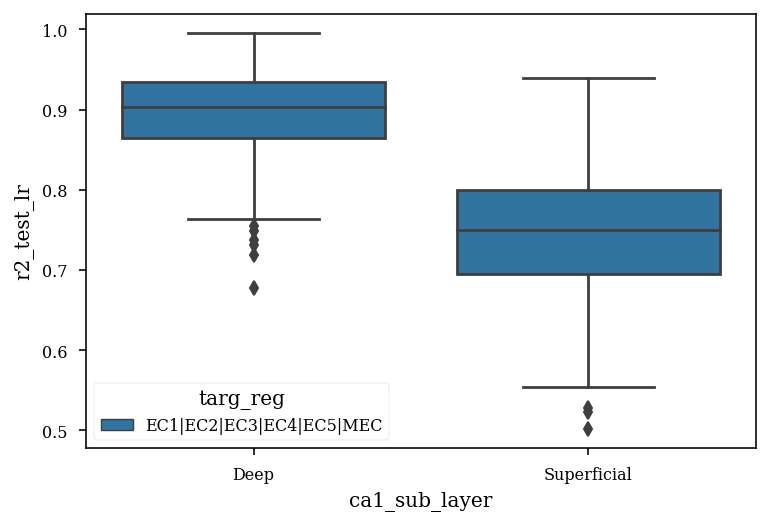

In [64]:
sns.boxplot(x="ca1_sub_layer", y="r2_test_lr",hue="targ_reg", data=results)

In [6]:
def get_data(basepath, target_regions, reference_region, rip_exp=0.5):
    st, cm = loading.load_spikes(
        basepath, brainRegion=[*target_regions, *reference_region]
    )
    cm = add_new_deep_sup.deep_sup_from_deepSuperficialDistance(cm)

    ripples = loading.load_ripples_events(basepath)
    ripple_epochs = nel.EpochArray([np.array([ripples.peaks, ripples.peaks]).T]).expand(
        rip_exp
    )

    ep_df = loading.load_epoch(basepath)
    ep_df = compress_repeated_epochs.main(ep_df, epoch_name="sleep")
    session_epoch = nel.EpochArray(
        [np.array([ep_df.startTime.iloc[0], ep_df.stopTime.iloc[-1]]).T]
    )

    # locate pre task post structure
    idx, _ = functions.find_pre_task_post(ep_df.environment)
    if idx is None:
        return None, None, None, None, None, None, None, None

    ep_df = ep_df[idx]
    ep_epochs = nel.EpochArray([np.array([ep_df.startTime, ep_df.stopTime]).T])

    state_dict = loading.load_SleepState_states(basepath)
    nrem_epochs = nel.EpochArray(state_dict["NREMstate"])
    wake_epochs = nel.EpochArray(state_dict["WAKEstate"])

    return (
        st,
        cm,
        ripple_epochs,
        ep_epochs,
        ep_df,
        session_epoch,
        nrem_epochs,
        wake_epochs,
        ripples
    )


In [7]:
basepath = "Z:\Data\HMC1\day13"

reference_region=["CA1"]
target_regions=["PFC", "EC1|EC2|EC3|EC4|EC5|MEC"]
rip_exp=0.5

(
    st,
    cm,
    ripple_epochs,
    ep_epochs,
    ep_df,
    session_epoch,
    nrem_epochs,
    wake_epochs,
    ripples
) = get_data(
    basepath,
    target_regions,
    reference_region,
    rip_exp=rip_exp,
)

In [8]:
st,ripple_epochs,nrem_epochs,wake_epochs,session_epoch,ep_epochs

(<SpikeTrainArray at 0x1bab9f0d6d0: 427 units> at 20000 Hz,
 <EpochArray at 0x1ba9cf528b0: 7,472 epochs> of length 1:33:13:868 hours,
 <EpochArray at 0x1ba9cf52190: 106 epochs> of length 3:06:39 hours,
 <EpochArray at 0x1ba9cf522b0: 113 epochs> of length 3:14:29 hours,
 <EpochArray at 0x1ba9cf521f0: 1 epoch> of length 6:49:18:073 hours,
 <EpochArray at 0x1ba9cf52520: 3 epochs> of length 6:49:18:073 hours)

In [33]:
sum(ripples.duration >= .1)

369

In [9]:
ca1_idx = (
    cm.brainRegion.str.contains("CA1").values
    & (cm.deepSuperficial == "Deep")
    & (cm.putativeCellType.str.contains("Pyr"))
)

target_idx = (
    cm.brainRegion.str.contains("PFC").values
    & cm.putativeCellType.str.contains("Pyr").values
)

In [10]:
bst = st[ripple_epochs[1]].bin(ds=0.001).smooth(sigma=0.015)

In [14]:
bst = []
for i in range(1,10):
    bst.append(st[ripple_epochs[i]].bin(ds=0.001).smooth(sigma=0.015).data)

In [20]:
X = np.array(bst)

In [24]:
X.shape

(9, 427, 1000)

In [27]:
X[:,ca1_idx,:].shape

(9, 71, 1000)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X[:,ca1_idx,:], X[:,target_idx,:])
reg.score(X[:,ca1_idx,:], X[:,target_idx,:])

In [179]:
ripple_epochs[1] & session_epoch

not (ripple_epochs[1] & nrem_epochs).isempty

# (ripple_epochs[1] & wake_epochs).isempty

# ripple_epochs[1] & ep_epochs[0]
for ep_i, ep in enumerate(ep_epochs):
    if not (ripple_epochs[1] & ep).isempty:
        print(ep)
        print(ep_df.loc[ep_i].environment)
        print(ep_df.loc[ep_i].name)
        break
# ripple_epochs[1] & ep_epochs

<EpochArray at 0x1ee9857db20: 1 epoch> of length 3:17:10:547 hours
sleep


In [180]:
ep_epochs.n_intervals

3

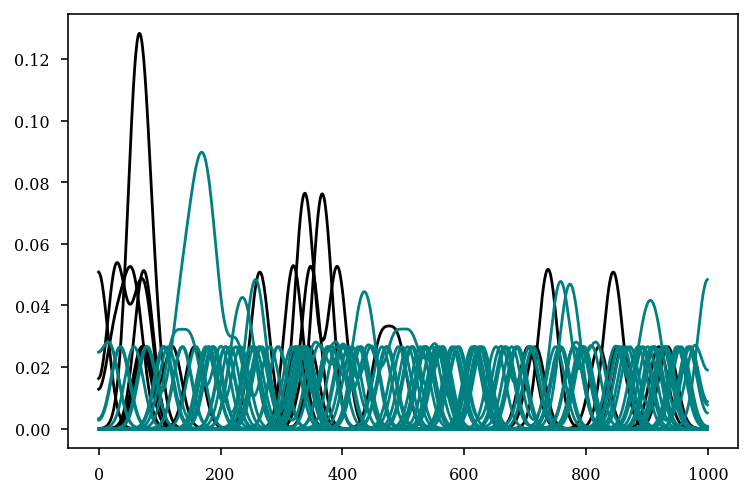

In [148]:
plt.plot(bst.data[ca1_idx,:].T,color="k")
plt.plot(bst.data[target_idx,:].T,color="teal")
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(bst.data)


# X_train, X_test, y_train, y_test = train_test_split(
#     X[ca1_idx,:],
#     X[target_idx,:],
#     test_size=0.4,
#     random_state=42,
#     shuffle=False,
# )

reg = LinearRegression().fit(X[ca1_idx,:].T, X[target_idx,:].T)
reg.score(X[ca1_idx,:].T, X[target_idx,:].T)

0.9173282495841347

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X[ca1_idx,:].T,
    X[target_idx,:].T,
    test_size=0.4,
    random_state=42,
    shuffle=True,
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600, 71), (400, 71), (600, 135), (400, 135))

In [12]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train), reg.score(X_test, y_test)

(0.9199790292793214, 0.9044012900838883)

In [13]:
from sklearn.cross_decomposition import CCA, PLSCanonical, PLSRegression
from sklearn.linear_model import MultiTaskElasticNetCV
from sklearn.ensemble import ExtraTreesRegressor


(1.0, 0.9980407610281445)

In [15]:
reg = ExtraTreesRegressor().fit(X_train, y_train)
reg.score(X_train, y_train), reg.score(X_test, y_test)


(1.0, 0.9979987410967801)

In [21]:
ripple_epochs
(7472*4*2*2)/60/60

33.208888888888886

In [ ]:
reg = ExtraTreesRegressor()
gsc = GridSearchCV(
    estimator=reg,
    param_grid={
        'n_estimators': range(50,126,25),
        'max_features': range(50,401,50),
        'min_samples_leaf': range(20,50,5),
        'min_samples_split': range(15,36,5),
    },
    scoring='r2',
    cv=5
)

grid_result = gsc.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

for test_mean, train_mean, param in zip(
        grid_result.cv_results_['mean_test_score'],
        grid_result.cv_results_['mean_train_score'],
        grid_result.cv_results_['params']):
    print("Train: %f // Test : %f with: %r" % (train_mean, test_mean, param))

model = ExtraTreesRegressor(**grid_result.best_params_)
model.fit(X_train, y_train)
# df_sub = pd.DataFrame({'ID': id_test, 'y': model.predict(test)})

In [153]:
from sklearn.ensemble import BaggingRegressor

reg = BaggingRegressor().fit(X_train, y_train)
reg.score(X_train, y_train), reg.score(X_test, y_test)

(0.9952649711876875, 0.9644819603179334)

In [144]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)
reg.score(X_train, y_train), reg.score(X_test, y_test)

(0.9956320765685217, 0.9599047552277055)

In [90]:
from ripple_heterogeneity.utils import (
    kernel_reduced_rank_ridge_regression,
)
from sklearn.model_selection import GridSearchCV

def run_grid_search(X_train, y_train, n_grid=10, cv=5, max_rank=30):
    """
    grid_search: grid search for the reduced rank regressor
    """

    rank_grid = np.arange(1, min(X_train.shape[1], y_train.shape[1], max_rank)).astype(
        int
    )

    parameters_grid_search = {"rank": rank_grid}

    rrr = kernel_reduced_rank_ridge_regression.ReducedRankRegressor()

    # folds = TimeSeriesSplit(n_splits=cv)

    grid_search = GridSearchCV(
        rrr,
        parameters_grid_search,
        cv=cv,
        scoring="neg_mean_squared_error",
    )
    return grid_search.fit(X_train, y_train)

grid_search_result = run_grid_search(X_train, y_train, n_grid=10, cv=5, max_rank=30)


reg = kernel_reduced_rank_ridge_regression.ReducedRankRegressor()
reg.rank = int(grid_search_result.best_params_["rank"])

reg.fit(X_train, y_train)
reg.score(X_train, y_train), reg.score(X_test, y_test)

(0.7094822517219477, 0.6946804982474518)

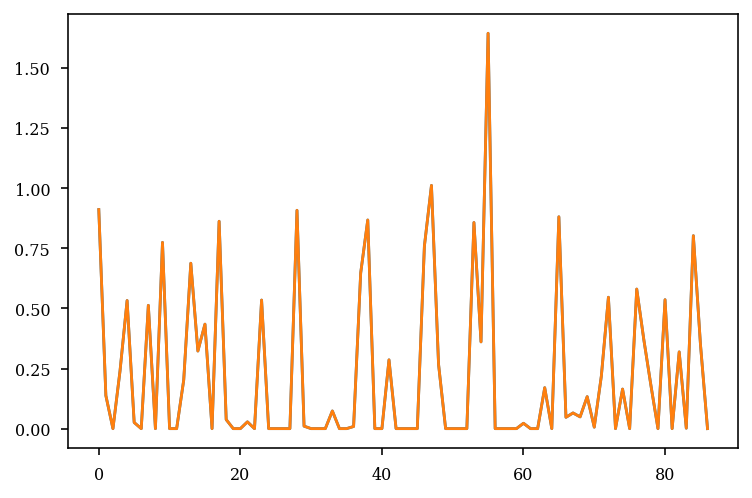

In [127]:
from sklearn.metrics import mean_squared_error

plt.plot(mean_squared_error(y_test, reg.predict(X_test),multioutput='raw_values'))

plt.plot((((y_test - reg.predict(X_test)))**2).mean(axis=0))


<AxesSubplot:>

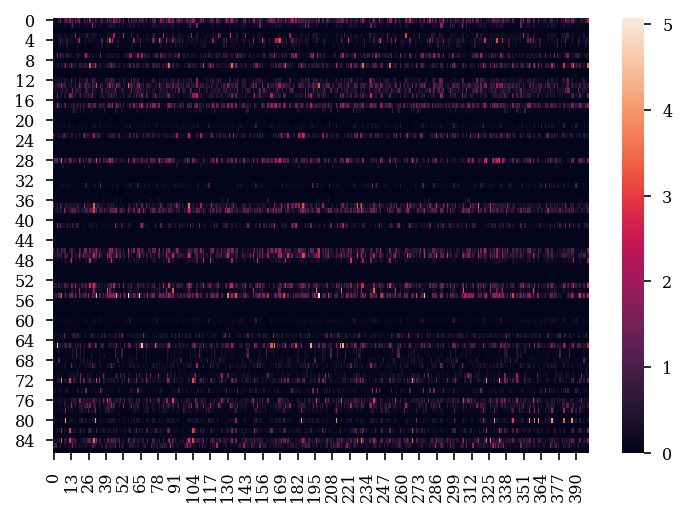

In [106]:
sns.heatmap(np.abs(y_test - reg.predict(X_test)).T)

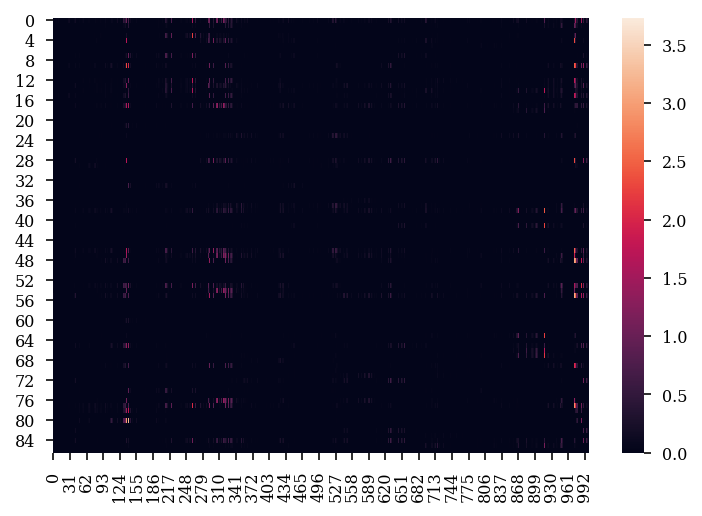

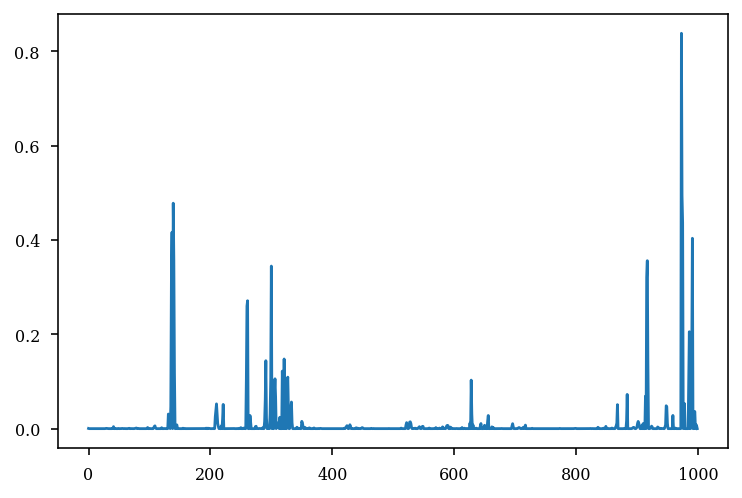

In [139]:
def mse_axis(y_test, y_pred, axis=1):
    return (((y_test - y_pred)**2).mean(axis=axis))

sns.heatmap(np.abs(X[target_idx,:].T - reg.predict(X[ca1_idx,:].T)).T)
plt.show()

mse = mse_axis(X[target_idx,:].T, reg.predict(X[ca1_idx,:].T), axis=1)
plt.plot(mse)

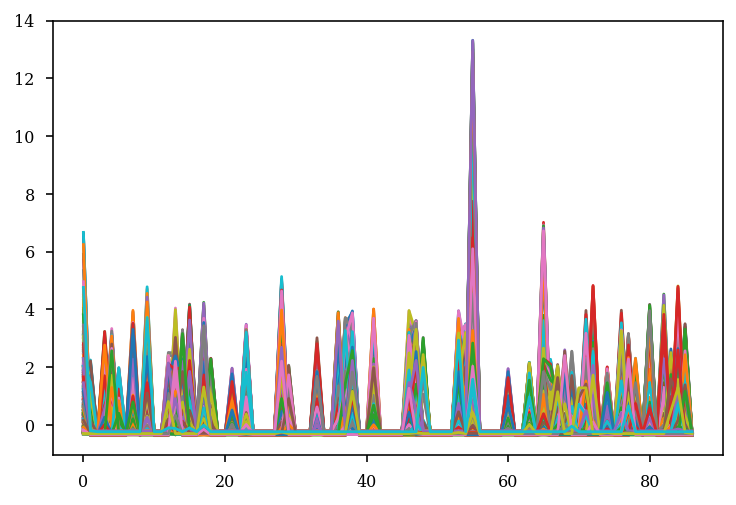

In [140]:
# plt.plot(reg.predict(X_test).T)
plt.plot(y_test.T)
plt.show()

In [ ]:
sns.heatmap(X_train.T)
plt.show()
sns.heatmap(X_test.T)
plt.show()
# sns.heatmap(reg.predict(X[ca1_idx,:].T).T)
# plt.show()

In [73]:
X[ca1_idx,:].shape, X[target_idx,:].shape

((29, 1000), (87, 1000))

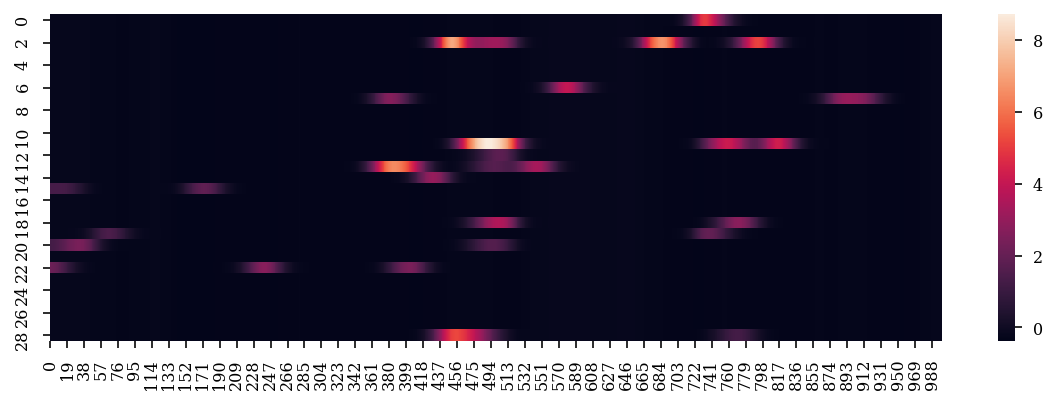

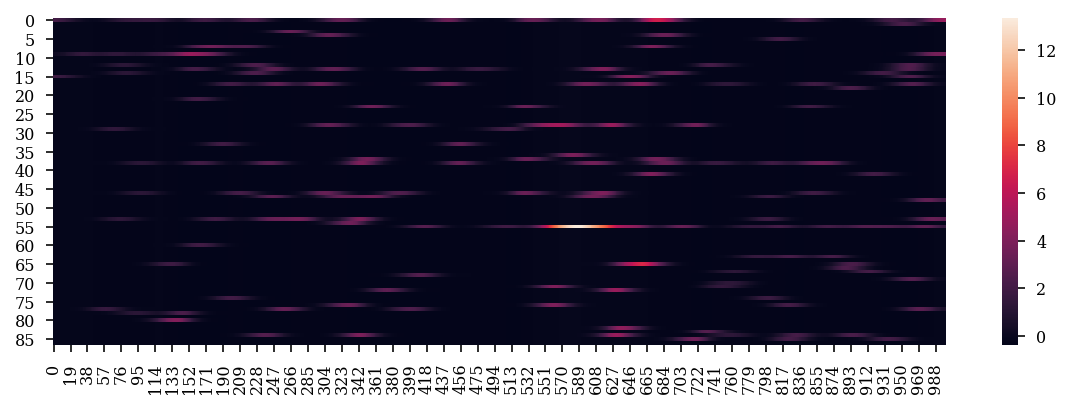

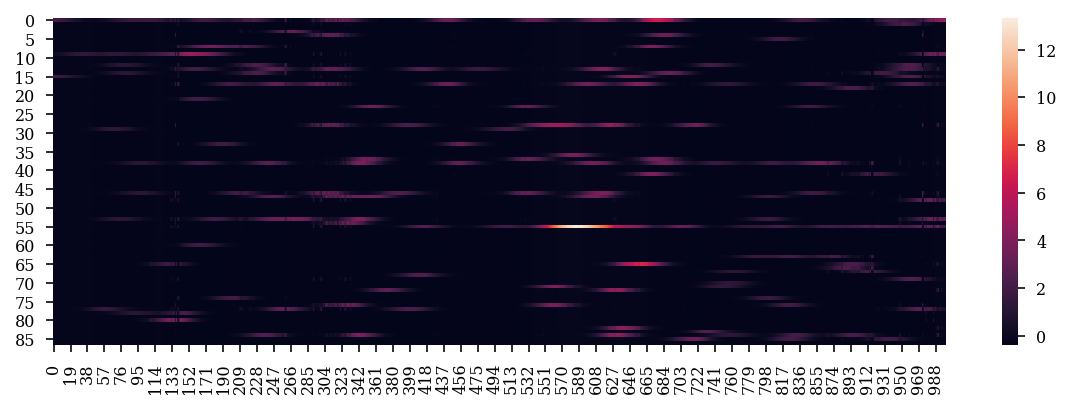

In [138]:
plt.figure(figsize=(10,3))
sns.heatmap(X[ca1_idx,:])
plt.show()

plt.figure(figsize=(10,3))
sns.heatmap(X[target_idx,:])
plt.show()

plt.figure(figsize=(10,3))
sns.heatmap(reg.predict(X[ca1_idx,:].T).T)
plt.show()


In [55]:
X[ca1_idx,:].shape, X[target_idx,:].shape

((29, 1000), (87, 1000))

In [52]:
X_train.shape

(600, 29)

<AxesSubplot:>

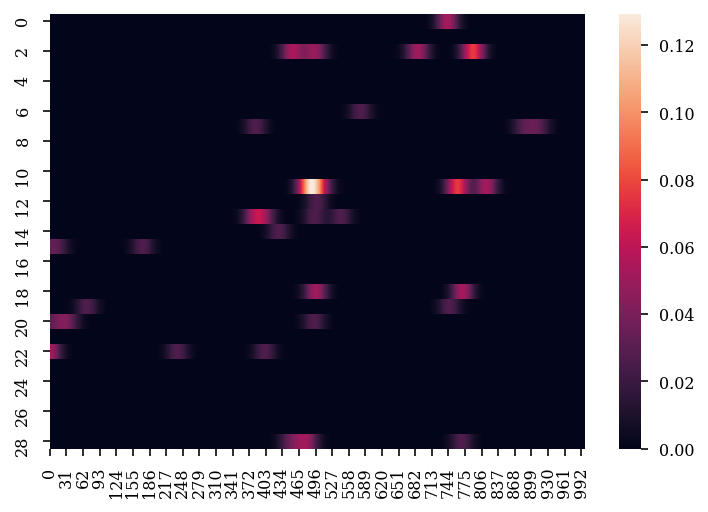

In [43]:
sns.heatmap(bst.data[ca1_idx,:])